# Problem Statement

Solve the PDE
$$
\frac{d^2u}{dx^2}=f(x)=1;\ \ \ \ \ \ \ \ \ \ \ u(0)=0, u(1)=0, \text{ where } x \in [0, 1]
$$

# Solution
- Discretising the domain in $n$ points and creating the $A\textbf{u}=b$ system of equations.
- Visualising the results for different $n$ values.

In [69]:
using Plots
theme(:dracula)

In [183]:
# Total internal points excluding boundaries
n = 27

# x values
x = range(0, 1, n+2)
# i indices
i = range(0, n-1, n+2);

# dx
Δx = x[2] - x[1];

In [184]:
function coefficient_K(n::Int)
    # A matrix
    A = zeros(n, n)
    for i=1:n
        # Diagonal Elements
        A[i,i] = 2
        if i ≠ 1
            # Lower Diagonal
            A[i, i-1] = -1
        end
        if i ≠ n
            # Upper diagonal
            A[i, i+1] = -1
        end
    end
    return A
end

coefficient_K (generic function with 1 method)

In [185]:
# Coefficient matrix
A = coefficient_K(n)

# RHS 
b = ones(n)*(Δx^2)

# Solve
u = A\b

println("Solution u: ", u)

# Appending boundary values to solution
pushfirst!(u, 0);
push!(u, 0);

Solution u: [0.017219387755102036, 0.03316326530612244, 0.0478316326530612, 0.06122448979591834, 0.07334183673469384, 0.0841836734693877, 0.09374999999999992, 0.1020408163265305, 0.10905612244897947, 0.11479591836734682, 0.11926020408163254, 0.1224489795918366, 0.12436224489795904, 0.12499999999999982, 0.12436224489795898, 0.12244897959183651, 0.1192602040816324, 0.11479591836734668, 0.10905612244897933, 0.10204081632653035, 0.09374999999999976, 0.08418367346938754, 0.0733418367346937, 0.061224489795918234, 0.04783163265306112, 0.03316326530612238, 0.017219387755102008]


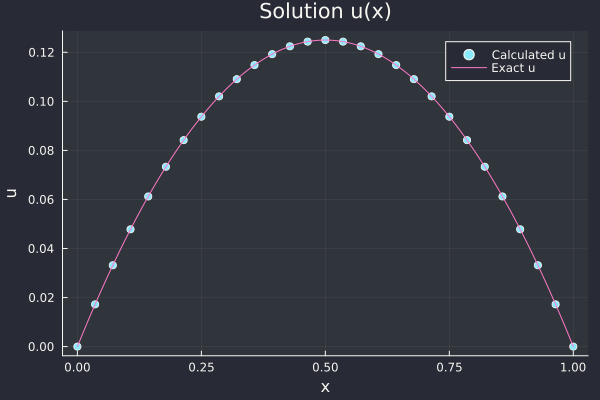

In [186]:
scatter(x, u, label="Calculated u", xlabel="x", ylabel="u", title="Solution u(x)")
fig = plot!(range(0, 1, 2000), -1/2*range(0, 1, 2000).^2 + 1/2*range(0, 1, 2000), label="Exact u", xlabel="x", ylabel="u", title="Solution u(x)")

display(fig)

In [187]:
savefig(fig, "../lect/img/Lect2_u30.png")

"/home/rvn/dev/Computational-Sciences/01_Applied_LinAlg/Lectures/img/Lect2_u30.png"

# Modified Problem

Solve the PDE
$$
\frac{d^2u}{dx^2}=f(x)=1;\ \ \ \ \ \ \ \ \ \ \ u'(0)=0, u(1)=0, \text{ where } x \in [0, 1]
$$


In [208]:
# Total internal points excluding boundaries
n = 27

# x values
x = range(0, 1, n+2)
# i indices
i = range(0, n-1, n+2);

# dx
Δx = x[2] - x[1];

In [200]:
function coefficient_T(n::Int)
    # A matrix
    A = zeros(n, n)
    for i=1:n
        # Diagonal Elements
        if i == 1
            A[i,i] = 1
        else
            A[i,i] = 2
        end
        if i ≠ 1
            # Lower Diagonal
            A[i, i-1] = -1
        end
        if i ≠ n
            # Upper diagonal
            A[i, i+1] = -1
        end
    end
    return A
end

coefficient_T (generic function with 1 method)

In [201]:
# Coefficient matrix
A = coefficient_T(n)

# RHS 
b = ones(n)*(Δx^2)

# Solve
u = A\b

println("Solution u: ", u)

# Appending boundary values to solution
pushfirst!(u, u[1]); # u_0 = u_1
push!(u, 0);

Solution u: [0.375, 0.3125, 0.1875]


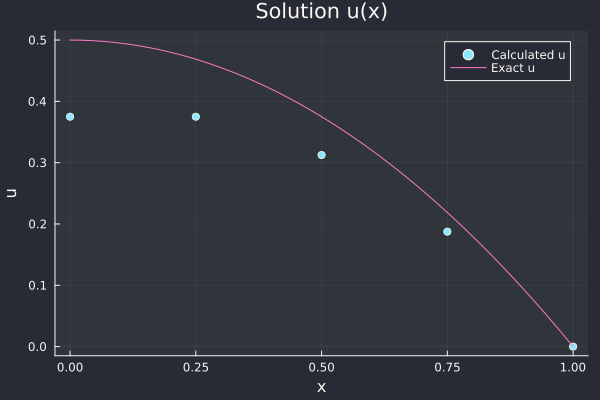

In [202]:
scatter(x, u, label="Calculated u", xlabel="x", ylabel="u", title="Solution u(x)")
fig = plot!(range(0, 1, 2000), -1/2*range(0, 1, 2000).^2 .+ 1/2, label="Exact u", xlabel="x", ylabel="u", title="Solution u(x)")

display(fig)

In [203]:
savefig(fig, "../lect/img/Lect2_u_T3.png")

"/home/rvn/dev/Computational-Sciences/01_Applied_LinAlg/Lectures/img/Lect2_u_T3.png"

## 2nd Order Accurate

In [209]:
# Coefficient matrix
A = coefficient_T(n+1)

# RHS 
b = ones(n+1)*(Δx^2)
b[1] /= 2

# Solve
u = A\b

println("Solution u: ", u)

# Appending boundary values to solution
push!(u, 0);

Solution u: [0.5000000000000002, 0.4993622448979594, 0.4974489795918369, 0.49426020408163285, 0.48979591836734715, 0.4840561224489798, 0.4770408163265308, 0.46875000000000017, 0.45918367346938793, 0.4483418367346941, 0.43622448979591855, 0.4228316326530614, 0.4081632653061226, 0.39221938775510223, 0.37500000000000017, 0.3565051020408165, 0.33673469387755117, 0.31568877551020424, 0.29336734693877564, 0.2697704081632654, 0.24489795918367357, 0.21875000000000008, 0.19132653061224497, 0.16262755102040824, 0.13265306122448986, 0.10140306122448985, 0.0688775510204082, 0.035076530612244916]


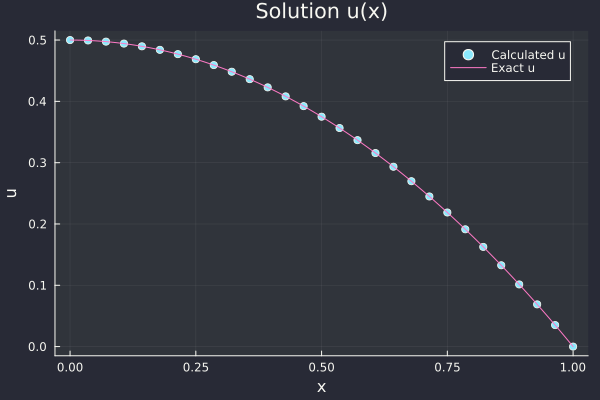

In [210]:
scatter(x, u, label="Calculated u", xlabel="x", ylabel="u", title="Solution u(x)")
fig = plot!(range(0, 1, 2000), -1/2*range(0, 1, 2000).^2 .+ 1/2, label="Exact u", xlabel="x", ylabel="u", title="Solution u(x)")

display(fig)

In [211]:
savefig(fig, "../lect/img/Lect2_u2_T30.png")

"/home/rvn/dev/Computational-Sciences/01_Applied_LinAlg/Lectures/img/Lect2_u2_T30.png"